<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_2_1124_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <딥러닝 파이토치 교과서> ​7장 p.360-371

# 7,1 시계열 문제

시간에 따라 변하는 데이터를 사용하여 추이를 분석

- 불규칙 변동
- 추세 변동
- 순환 변동
- 계절 변동

규칙적 시계열은 트렌드와 분산이 불변하는 데이터

불규칙적 시계열은 트렌드 혹은 분산이 변화하는 시계열 데이터

# 7.2 AR, MA, ARMA, ARIMA

독립 변수를 사용하여 종속 변수를 예측하는 일반적인 머신러닝에서 시간을 독립변수로 사용한다는 특징이 있음

## 7.2.1 AR 모델

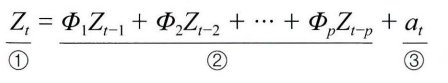

## 7.2.2 MA 모델

트렌드가 변화하는 상황에 적합한 회귀 모델
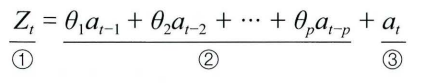

## ARMA 모델

AR과 MA를 섞은 모델로 연구 기관에서 주로 사용

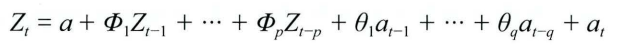

## 7.2.4 ARIMA 모델

자기 회귀와 이동 평균을 둘다 고려하는 모형

 ARMA와 달리 과거 데이터의 선형관계 뿐만 아니라 추세까지 고려한 모델



/tmp/ipython-input-2961411172.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0,
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Fri, 28 Nov 2025   AIC                            411.302
Time:                        04:23:01   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

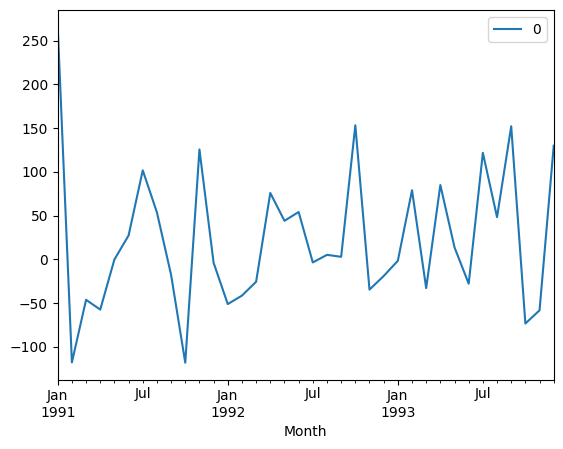

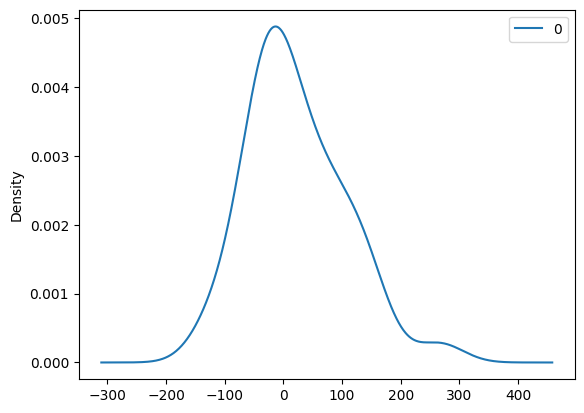

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [1]:
# 7-1: ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0,
                  date_parser=parser)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

값이 치우쳐 있음을 확인할 수 있음

/tmp/ipython-input-1656399484.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0,
/tmp/ipython-input-1656399484.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat,obs))


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070407, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


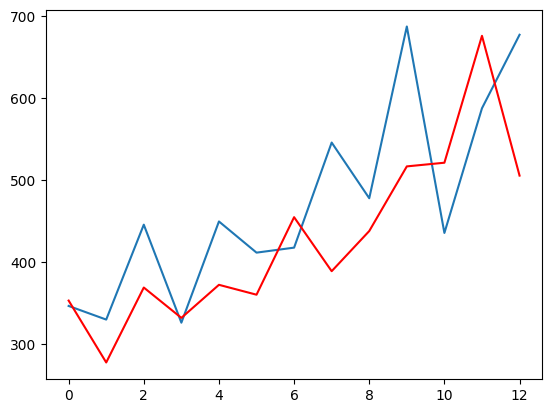

In [2]:
# 7-2: statsmodels 라이브러리를 이용한 sales 데이터셋 예측

import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0,
                  date_parser=parser)

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

데이터가 우상향 추세를 나타내고 있으므로 자전거 판매가 향후에도 계속 증가할 것임을 예측

# 7.3  순한 신경망 (RNN)

시간적으로 연속성이 있는 데이터를 처리하려고 고안된 인공 신경망

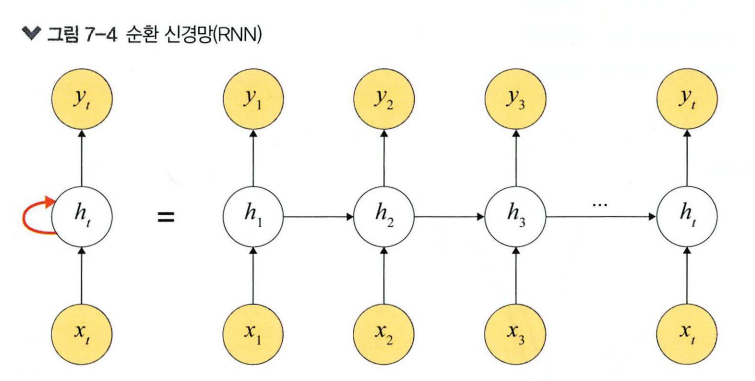

1. 일대일
2. 일대다
3. 다대일
4. 다대다
5. 동기화 다대다

## 7.3.1 RNN 계층과 셀

RNN은 내장된 계층뿐만 아니라 셀 레벨의 API도 제공.
RNN 계층이 입력된 배치 순서대로 모두 처리하는 것과 다르게 RNN 셀은 오직 하나의 단계만 처리.
RNN 셀은 RNN 계층의 for loop 구문을 갖는 구조라고 할 수 있다.

1. nn.RNNCell
2. nn.GRUCell
3. nn.LSTMCell

# RNN 실습코드

## 1. 문자단위 RNN (Char RNN)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

### 1) 훈련 데이터 전처리하기



In [4]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


In [5]:
# 하이퍼 파라미터 정의

input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [6]:
# 문자집합에 고유한 정수 부여

char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [7]:
# 입력 데이터와 레이블 데이터의 각 문자들을 정수로 맵핑

x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [8]:
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [9]:
# 원-핫 벡터로 바꿈

x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [10]:
# 입력 데이터와 레이블 데이터를 텐서로 바꿔줌

X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

/tmp/ipython-input-4021360853.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  X = torch.FloatTensor(x_one_hot)


In [11]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


### 2) 모델 구현하기

In [12]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [13]:
net = Net(input_size, hidden_size, output_size)

In [14]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


In [15]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환


torch.Size([5, 5])


In [16]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [17]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [20]:
index_to_char = dict((i, c) for i, c in enumerate(char_vocab))
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.2199089527130127 prediction:  [[4 4 4 4 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  ppppp
1 loss:  1.0713800191879272 prediction:  [[4 4 4 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppep
2 loss:  0.9187169075012207 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
3 loss:  0.7648730278015137 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
4 loss:  0.6231158375740051 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
5 loss:  0.5059218406677246 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
6 loss:  0.39777785539627075 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  0.2931893467903137 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  0.20747768878936768 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.14503832161426544 prediction:  [[4 4 3 2 0

## 2. 더 많은 데이터로 학습한 문자 단위 RNN (Char RNN)



In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

### 1) 훈련 데이터 전처리하기

In [22]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [24]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [25]:
print(char_dic) # 공백도 여기서는 하나의 원소

{'i': 0, 'a': 1, 'b': 2, 'r': 3, 'e': 4, 'w': 5, 'p': 6, ' ': 7, "'": 8, 'y': 9, 'd': 10, 'n': 11, ',': 12, 'g': 13, '.': 14, 'l': 15, 'o': 16, 'm': 17, 'u': 18, 'k': 19, 's': 20, 't': 21, 'c': 22, 'h': 23, 'f': 24}


In [26]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


In [27]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

In [28]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [29]:
print(x_data[0])
print(y_data[0])

[0, 24, 7, 9, 16, 18, 7, 5, 1, 11]
[24, 7, 9, 16, 18, 7, 5, 1, 11, 21]


In [30]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [31]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


In [32]:
print(X[0])

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

In [33]:
print(Y[0])

tensor([24,  7,  9, 16, 18,  7,  5,  1, 11, 21])


### 2) 모델 구현하기

In [34]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [35]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

In [36]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [38]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


In [40]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


In [41]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [42]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

faaaaaaaaaaaaaaaaaaaaaaaafaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaafaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaafafaaaaaaaaaaaaaaaaa
                                                                                                                                                                                   
d.seoyseoyyyyyyyyy.y.yy..yy.yyy..yyyyyyy.yyyy..yyyyyyyy.yy.yyy.yyyy.yyyy.yy..yyy..yyy.y.yy.yyyy.yyyy.yy.yyyy.yyyy.yy.yyyy...yyy.yyyyyyy..yyyy.y.yy.yy.yyyyyyyyyyy..yyyyyyyyy.yyyyyy
dseef.teayydnsydad.ysf..dn..dds..ad..yfsy.dyds.fsd.ddy.dn..fdy.sfdsyfdsd.yds.dda..fddy.sfs..fds.dndy.dn.d.fy..ddd.yddy.ddd..ans.sfd.df.yan.dnsd.f..ydd..addsyddn.ydy.ddsdnfdysdfysn
nougdonoubgubrl'lrrgrgbbgrarlgrrbgrrlggrrugbbbugbahubbbrrrbgrrrngbrrgrubrbbdbgbbrb'brrbglrhbgurrbgrrrlgbggbsrgguarlburdgurrbgurrclrruglhbbrlgblbbrbgrrabgbrroggbrrrbblrrrggbhrrblbb
osn dsrroohnhshoostonhossnososn  hsnoosnssosssoossssoosstooontsohsnoossnnsnsnononhossnhost ohstooont